# Principal Component Analysis

### Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.decomposition import PCA # for applying PCA
from sklearn.linear_model import LogisticRegression # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
from matplotlib.colors import ListedColormap # for visualization

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [2]:
dataset.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset.tail(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [4]:
np.set_printoptions(suppress=True, threshold=13)

In [5]:
X[0]

array([   14.23,     1.71,     2.43,    15.6 ,   127.  ,     2.8 ,
           3.06,     0.28,     2.29,     5.64,     1.04,     3.92,  1065.  ])

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Applying Pricipal Componene Analysism

First lets see the variance by the 13 independent variables. For this we need to create an object of PCA with **n_components** parameter as **None**

```python
pca = PCA(n_components = None)
pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
```

Then lets print explained variance ratio.

```python
print(explained_variance)

array([ 0.35900066,  0.18691934,  0.11606557,  0.07371716,  0.0665386 ,
        0.04854582,  0.04195042,  0.02683922,  0.0234746 ,  0.01889734,
        0.01715943,  0.01262928,  0.00826257])
```

This shows principal component that explain the variance in decending order.

Here the 1st principal component expalains 36% of the variance. top two expalins 55% (i.e. 36%+19%) of the variance. Now we need to select the first 2 principal components.

In [8]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [9]:
explained_variance

array([ 0.35900066,  0.18691934])

In [10]:
X_test[0]

array([ 2.06784347, -1.02818265])

In [11]:
X_train[0]

array([-1.16602698, -3.61532732])

### Fitting Logistic Regression to the Training Set

In [12]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting Test set result

In [13]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred[0:10]

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3])

In [16]:
y_test[0:10]

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3])

### Making the Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

#### Here we have ~~almost~~ no incorrect prediction at all.

### Accuracy

In [18]:
(cm[0][0] + cm[1][1] + cm[2][2])/ np.sum(cm)

1.0

### Visualizing the training set results

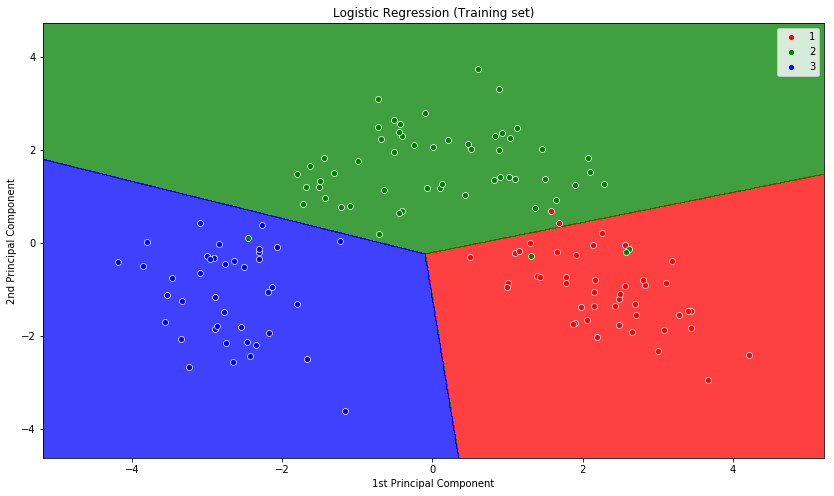

In [20]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))
# plot the contour
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green', 'blue')))
# plot the points
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Logistic Regression (Training set)')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend()

### Visualizing the test set results

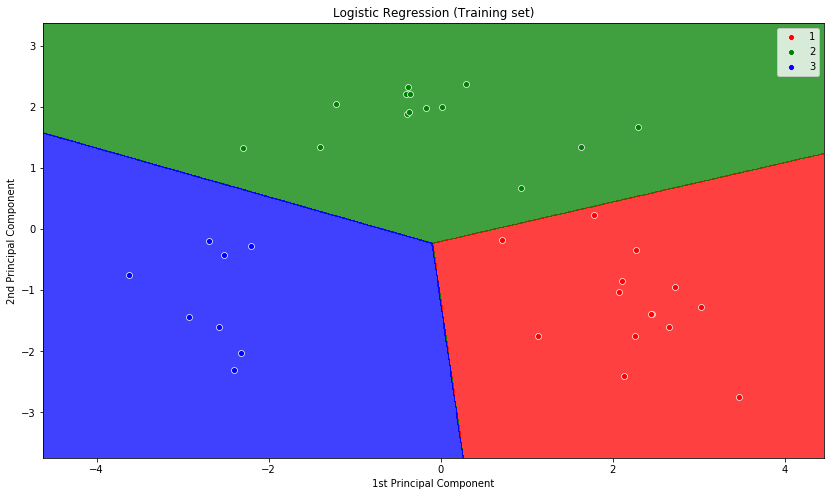

In [21]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))
# plot the contour
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green', 'blue')))
# plot the points
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Logistic Regression (Training set)')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend()